### 게임별 클러스터링은 사용하지 않기로 했음.
- 게임별로 K-means 클러스터링을 실행하였을 때, 유의미한 값이 도출되지 않았습니다.
- 0 : 대부분의 게임, 접속로그가 15일내에 낮은 분포를 띄는 그룹
- 1~2: 접속로그가 많은 게임
- 게임별로 클러스터링하는 것이 유저별로 데이터 특성을 사용하기로 한 우리의 프로젝트와 결과적으로 맞지 않다고 판단하였습니다.

### 유저별 클러스터링
- 결과 : 날짜데이터를 제외한 데이터를 PCA를 통해 차원축소하여 클러스터링을 DBSCAN으로 실행하여 실험해본 결과가 가장 유의미한 데이터로 판단되었습니다.

- 사용한 데이터 : 날짜데이터를 포함한 데이터, 표준화, PCA 이 세가지를 혼용하여 여러가지 실험을 통해 가장 유의미한 분포를 띄고 사용가능한 방법을 채택하였습니다.

- 사용한 클러스터링 방법 : K-means, DBSCAN

참고 블로그 : 아이디어 : https://blog.ncsoft.com/25333/
DTW : https://dacon.io/codeshare/1625, https://tootouch.github.io/contest%20review/kdx_dashboard_part2/
DBSCAN : https://data-newbie.tistory.com/25


#### 전체적인 실험 결과
K-means :
장점 :원하는 만큼 클러스터링 정해서 사용가능
단점 : 대신 정확도가 떨어짐(시각화해서 볼때 판명가능)

DBSCAN :
장점 : 패턴별로 유형이 잘나뉘어짐
단점 : 표준화를 사용할 수 없음(무슨이유인지 모르나 표쥰화를 사용하면 세션다운)

방법론적:

####k-means
1) 3~5일안에 유저 데이터를 하나로 통합하여 사용하기 (inDate 정보를 삭제)
문제점 : 데이터 분포가 3개로 보이는데 (삼각대 모양 분포) 클러스터링이 제대로 잡아내지 못함(불균형) (그림1번 참고)

2) 3~5일안에 유저 데이터를 날짜 데이터를 넣고 사용하기(날짜 encoding 없음)
문제점 : 겹치는 데이터 분포( 그림 1번보다 입체적이지 않고 평면 그래프 같이 나타납니다)(그림 2번 참조)
3일 마다 유저별로 다른 클러스터링이 되고 있음.(1일:0,2일:1,3일:1일 같은 경우)

3)3~5일안에 유저 데이터를 날짜 데이터를 넣고 사용하기(날짜 encoding 실행)
문제점 : encoding 했을 때와 크게 변화 없음 
3일 마다 유저별로 다른 클러스터링이 되고 있음.(1일:0,2일:1,3일:1일 같은 경우)

4)전체 데이터를 그대로 돌리기
문제점 : 데이터의 단순화

####DBSCAN

1)indate 정보를 삭제하고 표준화를 하지 않은 데이터로 실행:
문제점 : 클러스터링 라벨링의 개수가 제멋대로,, 그래도 80퍼센트 불균형 데이터
장점 : 확실히 데이터 패턴이 다른 것끼리 구분됌 (그림 3번 참고)

2)indate 정보를 넣고 표준화를 하지 않은 데이터로 실행:
문제점 : 데이터 분포가 뭉쳐있고 불균형 데이터가 심함 


### 클러스터링 실행

#### 1. 초기 데이터 불러오기

In [16]:
#데이터 불러오기
import pandas as pd

df_list=[]

for i in range(0,30):
  globals()['data_{}'.format(i)] = pd.read_csv(f'/content/drive/MyDrive/코드스테이츠 과제/AFI_project/data{i}.csv')
  #df_list.append('df_{}'.format(i))

for i in range(0,30):
  globals()['df_{}'.format(i)] = pd.read_csv(f'/content/drive/MyDrive/코드스테이츠 과제/AFI_project/태연데이터/데이터/df_{i}.csv')
  #df_list.append('df_30a_{}'.format(i))

# 데이터 concat
df_list = [data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20,data_21,data_22,data_23,data_24,data_25,data_26,data_27,data_28,data_29,
           df_0,df_1, df_2, df_3, df_4, df_5,df_6, df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19,df_20,df_21,df_22,df_23,df_24,df_25,df_26,df_27,df_28,df_29]
df = pd.concat(df_list, ignore_index=True)
df

gamer_id  ... action
0         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...      1
1         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...      1
2         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...     11
3         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...    106
4         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...      1
...                                                     ...  ...    ...
23053420  fff6fdd9937e3b5964e902d388d08c6a183217227b8a9c...  ...     32
23053421  fff6fdd9937e3b5964e902d388d08c6a183217227b8a9c...  ...     27
23053422  fff6fdd9937e3b5964e902d388d08c6a183217227b8a9c...  ...     27
23053423  fff6fdd9937e3b5964e902d388d08c6a183217227b8a9c...  ...      1
23053424  fff6fdd9937e3b5964e902d388d08c6a183217227b8a9c...  ...      1

[23053425 rows x 6 columns]

In [17]:
#전체 전처리 과정

### 요일 ###

# inDate열을 datetime 형태로 변환
df['inDate'] = pd.to_datetime(df['inDate'])

# 요일 columns 생성 (0:월요일,1:화요일,2:수요일,3:목요일,4:금요일,5:토요일,6:일요일)
df['day'] = df['inDate'].apply(lambda x: x.weekday())

### 총 접속수 ###

#merge를 위한 right table 생성
merge = df[['gamer_id', 'inDate', 'category']] #category를 날짜단위 접속수로 활용

# 첫번째 그룹바이
merge = merge.groupby(by=['gamer_id', 'inDate']).count().reset_index()

# 두번째 그룹바이 : inDate 값 == 유저별 총 접속 날짜수
merge = merge.groupby(by=['gamer_id']).count().reset_index()

# 열이름 변경
merge = merge.rename(columns={"inDate":"login_total"})

# 총접속수 열만 남김
merge = merge[['gamer_id', 'login_total']]

# merge
df = pd.merge(df, merge, left_on='gamer_id', right_on='gamer_id')



### 이전 접속일과의 차이 ###

# merge를 위한 데이터테이블 생성
merge_2 = df[['gamer_id', 'inDate']]
merge_2 = merge_2.groupby(by=['gamer_id', 'inDate']).count().reset_index()

li_1 = []
li_2 = []
for i in range(0, len(merge_2)):
    if i == 0:
        li_1.append(merge_2['inDate'].iloc[i])
        li_2.append(li_1[i] - li_1[i])
      
    elif merge_2['gamer_id'][i] == merge_2['gamer_id'][i-1]:
        li_1.append(merge_2['inDate'].iloc[i])
        li_2.append(li_1[i] - li_1[i-1])
    
    else: # 이전 gamer_id와 다르면
        li_1.append(merge_2['inDate'].iloc[i])
        li_2.append(li_1[i] - li_1[i])

merge_2['diff'] = li_2
merge_2['diff'] = merge_2['diff'].apply(lambda x: int(str(x)[0]))

# merge
df = pd.merge(left=df, right=merge_2, on=['gamer_id', 'inDate'])

#평균 접속 주기 작성
df_group = df[['gamer_id', 'diff', 'login_total']].groupby(by=['gamer_id','diff']).count().reset_index()
df_group = df_group[['gamer_id','diff']]
df_group_0 = df_group[df_group['diff'] != 0] # 첫 접속 제외

# 전체유저 각각의 평균접속주기
df_login_mean = df_group_0.groupby(by=['gamer_id']).mean().reset_index()
df_login_mean = df_login_mean.rename(columns = {'diff':'login_mean'})

# merge ==> outer 병합인 이유는 첫접속만 한 유저들은 평균값이 존재하지 않기 때문에 NaN 값으로 넣기 위해
df = pd.merge(left=df, right=df_login_mean, how='outer', on='gamer_id')

df = df.fillna(1*(10**(-6)))
#df.isnull().sum()

#불필요한 카테고리 삭제(특성 중요도 확인하고 확정)
category_idx = df.index[(df['category'] == 'push') | (df['category'] == 'gameLog') | (df['category'] == 'dbschema') | (df['category'] == 'matchmake') | (df['category'] == 'billing') | (df['category'] == 'authorization')]
df = df.drop(category_idx)

### 출력 ###
df

gamer_id  ... login_mean
0         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...   1.000000
1         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...   1.000000
2         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...   1.000000
3         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...   1.000000
4         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...   1.000000
...                                                     ...  ...        ...
23053420  fee679e7e1f4545e078845e012e641df3e24b57d06b9c3...  ...   0.000001
23053421  ff3d23d49f0a82a26e3aee8a6e14d6bff858b3009186cf...  ...   0.000001
23053422  ff3d23d49f0a82a26e3aee8a6e14d6bff858b3009186cf...  ...   0.000001
23053423  ff5d6c605be5494de51447bd92fed7456f765fb0a55a32...  ...   0.000001
23053424  ff5d6c605be5494de51447bd92fed7456f765fb0a55a32...  ...   0.000001

[23017974 rows x 10 columns]

####2. 클러스터링에 사용할 데이터로 전처리

In [36]:
#1번
#시간 열 삭제
df_user = df.drop('time',axis=1)

#유저 데이터를 인코딩(순차적으로 하나씩 기간을 사용)

#df_user = df_user[df_user['inDate']<='2021-12-30']
#df_user = df_user[(df_user['inDate']>'2021-12-30') & (df_user['inDate']<='2022-01-02')]
#df_user = df_user[(df_user['inDate']>'2022-01-01') & (df_user['inDate']<='2022-01-05')]
#df_user = df_user[(df_user['inDate']>'2022-01-04') & (df_user['inDate']<='2022-01-08')]
df_user = df_user[(df_user['inDate']>'2022-01-07') & (df_user['inDate']<='2022-01-11')]

#2번
#그룹화 해서 카테고리별 action 총합 구하기
df_user = df_user.groupby(by=['gamer_id', 'inDate', 'game_id','day','login_total', 'diff', 'login_mean', 'category']).sum()
df_user = df_user.reset_index()

#피벗으로 카테고리 펼치기
df_user = df_user.pivot(index=['gamer_id', 'inDate', 'game_id', 'day', 'login_total', 'diff',
       'login_mean'], columns='category', values='action')

#결측지 변환
df_user = df_user.fillna(0)

#데이터 프레임으로 변환
df_user.reset_index(inplace=True)

#3번
# 날짜 데이터 삭제 (indate(날짜), day(요일), diff(직전 접속 로그와의 날짜차이))
df_user = df_user.drop(['inDate','day','diff'],axis=1)
df_user=df_user.groupby(by=['gamer_id','game_id','login_total','login_mean']).sum()
df_user.reset_index(inplace=True)

#클러스터링에 입력할 최종 데이터 확인
user_id = df_user['gamer_id']
df_user = df_user.drop('gamer_id',axis=1)
df_user

category  game_id  login_total  login_mean  ...  probability   rank  social
0             490            4    1.000000  ...          0.0    3.0     0.0
1            1999            3    1.500000  ...          0.0    0.0     0.0
2            1916            8    1.000000  ...        153.0  359.0     0.0
3            1913            1    0.000001  ...          0.0   15.0     0.0
4            1999            1    0.000001  ...          0.0    0.0     0.0
...           ...          ...         ...  ...          ...    ...     ...
199174       1802            1    0.000001  ...         15.0    6.0     0.0
199175       2326            2    1.000000  ...         11.0    4.0     0.0
199176       2326            3    1.000000  ...         49.0   43.0     0.0
199177       2097            1    0.000001  ...          0.0    8.0     3.0
199178       1913            1    0.000001  ...          0.0    1.0     0.0

[199179 rows x 15 columns]

####3. 클러스터링에 적용

In [15]:
# 처음 한번만 사용하세요. (시간 그룹별 클러스터링 데이터 모집)
# df_user_total = pd.DataFrame()
# df_user_total['gamer_id']= sorted(df['gamer_id'].unique())

In [37]:
from sklearn.decomposition import PCA

pca = PCA(3) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(df_user)

PCAdf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2','principal component3'])

from sklearn.cluster import DBSCAN
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples = 1000) # scaling 하지 않은 데이터로 DBSCAN 학습
dbscan.fit(PCAdf)

print(np.unique(dbscan.labels_))

[-1  0  1  2  3  4  5]


In [38]:
#df_user_total으로 통합하기
df_user['gamer_id']= user_id

df_user['cluster4'] = dbscan.labels_

df_user = df_user.drop(['game_id','chart', 'chat', 'coupon', 'event', 'gameinfo', 'gamer','isAliveToken', 'notice', 'post', 'probability', 'rank', 'social','login_total','login_mean'],axis=1)

df_user_total = pd.merge(left=df_user_total, right=df_user, how='outer', on='gamer_id')

In [39]:
df_user_total

gamer_id  ...  cluster4
0       000010f658e9f47d01fd060a769e1d95395ac7c97c357d...  ...      -1.0
1       000012d4f585a9bb5d6975e157b79b3538b04885ac19c6...  ...       NaN
2       00002a907f341c6113a96699f6da7d69bff34f29853c47...  ...       NaN
3       00003fb64d5509abbd5921dfd4736d9fc8d2c392a42c25...  ...       NaN
4       0000bbd7d65a8cc77af85023344fb46e3a00d3772dcbf3...  ...      -1.0
...                                                   ...  ...       ...
545908  ffff55ab88728761706a92ef75d68394c5dad8edd66818...  ...       NaN
545909  ffff84a159d96864ec6ee5ae6c9c4386d3060666bcc5a1...  ...       NaN
545910  ffffebdf9cff7c9d118dbb90fe145fbeb61c4978e1692d...  ...       NaN
545911  fffff1f88815e0ba807c3ff28ebcb94d9dbd8fce805eae...  ...      -1.0
545912  fffff98c3ca2713d099b6fa011b43b4b5834e28234c2c6...  ...       NaN

[545913 rows x 6 columns]

In [41]:
#클러스터링 총합 자료 저장
df_user_total.to_csv("clustering_user.csv")

#### 클러스터링 시각화 예시

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


<Figure size 1440x720 with 0 Axes>

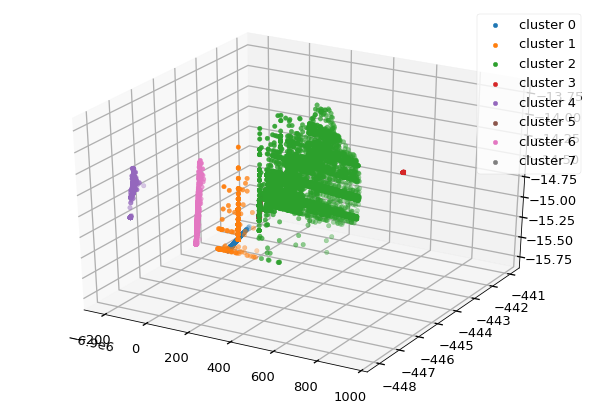

<Figure size 1440x720 with 0 Axes>

In [20]:
#클러스터링 된 결과 시각화 해보기 1
#dbscan = DBSCAN(eps=0.5, min_samples = 1000)

from matplotlib import style
import matplotlib.pyplot as plt

style.use('seaborn-talk')
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(0,8):
  label_name = "cluster " +str(i)
  ax.scatter(printcipalComponents[[dbscan.labels_==i]][:,0],printcipalComponents[[dbscan.labels_==i]][:,1],printcipalComponents[[dbscan.labels_==i]][:,2],label=label_name)
plt.legend()
plt.axis(option='tight')
plt.figure(figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


<Figure size 1440x720 with 0 Axes>

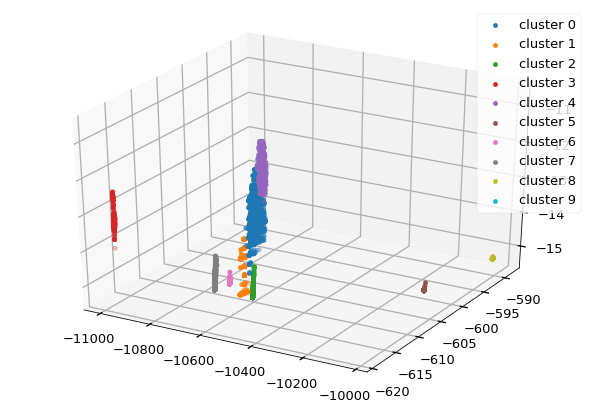

<Figure size 1440x720 with 0 Axes>

In [25]:
#클러스터링 된 결과 시각화 해보기 2
#dbscan = DBSCAN(eps=0.5, min_samples = 1000)

from matplotlib import style
import matplotlib.pyplot as plt

style.use('seaborn-talk')
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(0,10):
  label_name = "cluster " +str(i)
  ax.scatter(printcipalComponents[[dbscan.labels_==i]][:,0],printcipalComponents[[dbscan.labels_==i]][:,1],printcipalComponents[[dbscan.labels_==i]][:,2],label=label_name)
plt.legend()
plt.axis(option='tight')
plt.figure(figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


<Figure size 1440x720 with 0 Axes>

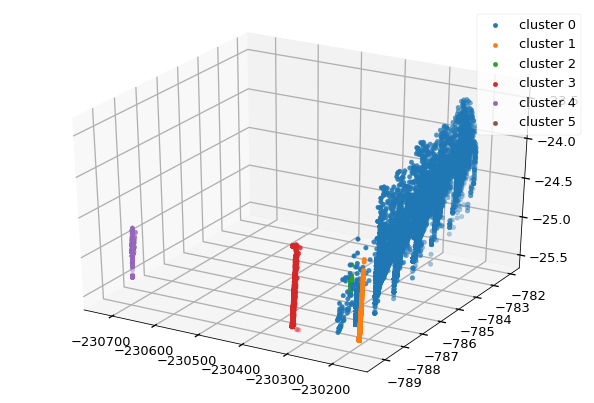

<Figure size 1440x720 with 0 Axes>

In [30]:
#클러스터링 된 결과 시각화 해보기 3
#dbscan = DBSCAN(eps=0.5, min_samples = 1000)

from matplotlib import style
import matplotlib.pyplot as plt

style.use('seaborn-talk')
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(0,6):
  label_name = "cluster " +str(i)
  ax.scatter(printcipalComponents[[dbscan.labels_==i]][:,0],printcipalComponents[[dbscan.labels_==i]][:,1],printcipalComponents[[dbscan.labels_==i]][:,2],label=label_name)
plt.legend()
plt.axis(option='tight')
plt.figure(figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


<Figure size 1440x720 with 0 Axes>

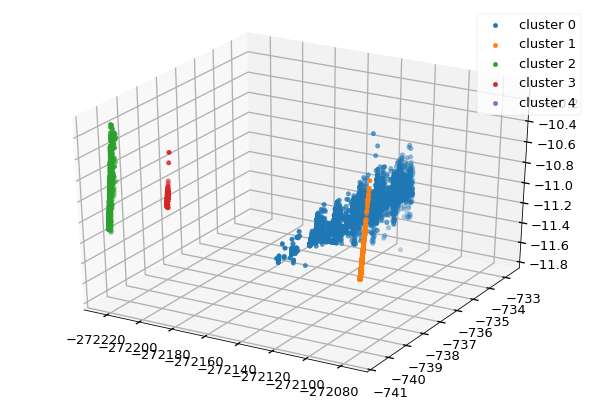

<Figure size 1440x720 with 0 Axes>

In [35]:
#클러스터링 된 결과 시각화 해보기 4
#dbscan = DBSCAN(eps=0.5, min_samples = 1000)

from matplotlib import style
import matplotlib.pyplot as plt

style.use('seaborn-talk')
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(0,5):
  label_name = "cluster " +str(i)
  ax.scatter(printcipalComponents[[dbscan.labels_==i]][:,0],printcipalComponents[[dbscan.labels_==i]][:,1],printcipalComponents[[dbscan.labels_==i]][:,2],label=label_name)
plt.legend()
plt.axis(option='tight')
plt.figure(figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


<Figure size 1440x720 with 0 Axes>

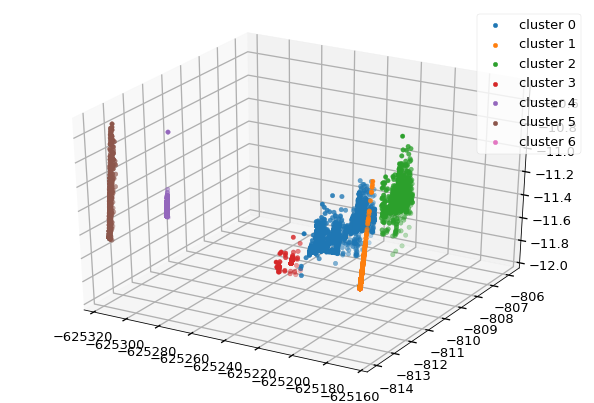

<Figure size 1440x720 with 0 Axes>

In [40]:
#클러스터링 된 결과 시각화 해보기 5
#dbscan = DBSCAN(eps=0.5, min_samples = 1000)

from matplotlib import style
import matplotlib.pyplot as plt

style.use('seaborn-talk')
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(0,7):
  label_name = "cluster " +str(i)
  ax.scatter(printcipalComponents[[dbscan.labels_==i]][:,0],printcipalComponents[[dbscan.labels_==i]][:,1],printcipalComponents[[dbscan.labels_==i]][:,2],label=label_name)
plt.legend()
plt.axis(option='tight')
plt.figure(figsize=(20,10))

### nan값을 -2로 매핑하여 계층적 클러스터링 진행 ( 데이터가 너무 크기 때문에 불가능 )


In [1]:
import pandas as pd
df_user_total = pd.read_csv('/content/drive/MyDrive/코드스테이츠 과제/AFI_project/clustering_user.csv', index_col=0)

In [2]:
df_user_total

gamer_id  ...  cluster4
0       000010f658e9f47d01fd060a769e1d95395ac7c97c357d...  ...      -1.0
1       000012d4f585a9bb5d6975e157b79b3538b04885ac19c6...  ...       NaN
2       00002a907f341c6113a96699f6da7d69bff34f29853c47...  ...       NaN
3       00003fb64d5509abbd5921dfd4736d9fc8d2c392a42c25...  ...       NaN
4       0000bbd7d65a8cc77af85023344fb46e3a00d3772dcbf3...  ...      -1.0
...                                                   ...  ...       ...
545908  ffff55ab88728761706a92ef75d68394c5dad8edd66818...  ...       NaN
545909  ffff84a159d96864ec6ee5ae6c9c4386d3060666bcc5a1...  ...       NaN
545910  ffffebdf9cff7c9d118dbb90fe145fbeb61c4978e1692d...  ...       NaN
545911  fffff1f88815e0ba807c3ff28ebcb94d9dbd8fce805eae...  ...      -1.0
545912  fffff98c3ca2713d099b6fa011b43b4b5834e28234c2c6...  ...       NaN

[545913 rows x 6 columns]

In [3]:
# nan값 치환
df_user_total= df_user_total.fillna(-2)

In [4]:
# 유저 id 삭제
df_user_total= df_user_total.drop('gamer_id',axis=1)

In [47]:
#표준화 실행
from sklearn.preprocessing import StandardScaler
df_user_total = StandardScaler().fit_transform(df_user_total)

In [ ]:
#병합 군집 클러스터링 실행
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
assignment = cluster.fit_predict(df_user_total)

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_user_total, method='ward'))

### DTW 클러스터링으로 시계열 데이터를 군집화 해보기

In [10]:
import pandas as pd
df_user_total = pd.read_csv('/content/drive/MyDrive/코드스테이츠 과제/AFI_project/clustering_user.csv', index_col=0)

In [2]:
# nan값 치환
df_user_total= df_user_total.fillna(-2)

In [3]:
# 유저 id 삭제
df_user_total= df_user_total.drop('gamer_id',axis=1)

In [4]:
pip install tslearn

     |████████████████████████████████| 793 kB 14.1 MB/s 


In [5]:
# DTW 적용해보기
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans

# clustering
km = TimeSeriesKMeans(n_clusters=5, 
                      metric="dtw", 
                      max_iter=2,
                      random_state=42)
prediction = km.fit_predict(df_user_total)

In [8]:
km.cluster_centers_.shape

(3, 5, 1)

In [6]:
km.cluster_centers_.shape

(5, 5, 1)

#### DTW cluster 3개일때

In [9]:
import collections
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
for i in range(3):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(prediction)[i])

Text(0.5, 1.7, 'Cluster Distribution (number of station)')

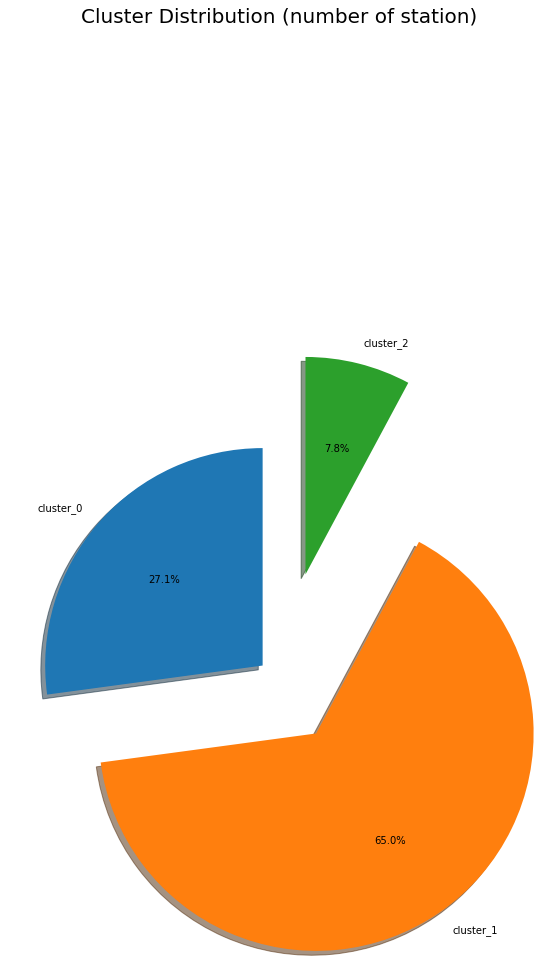

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.pie(sizes,labels=labels,explode=[0.1,0.3,0.5],shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Cluster Distribution (number of station)",position=(0.5,1.7),fontsize=20)

#### DTW cluster 5개일때

In [7]:
import collections
# 클러스터별 분포도를 시각화하기 위해 전처리 작업입니다.
labels = []
sizes = []
for i in range(5):
  labels.append("cluster_"+str(i))
  sizes.append(collections.Counter(prediction)[i])

Text(0.5, 1.7, 'Cluster Distribution (number of station)')

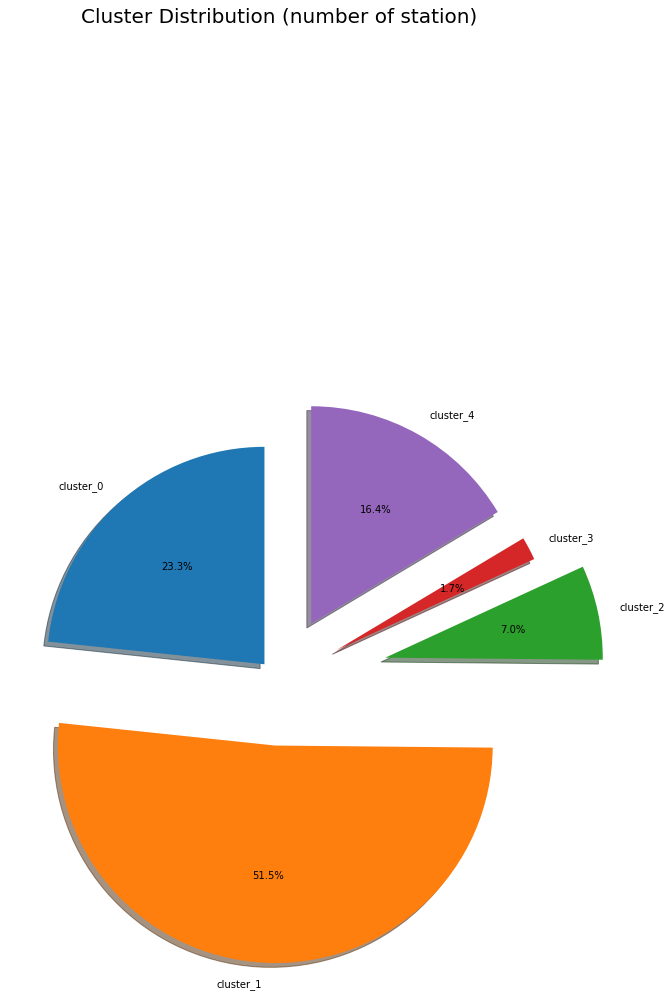

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.pie(sizes,labels=labels,explode=[0.1,0.3,0.5,0.3,0.3],shadow=True,startangle=90,autopct='%1.1f%%')
plt.title("Cluster Distribution (number of station)",position=(0.5,1.7),fontsize=20)

### 완성

In [11]:
df_user_total

gamer_id  ...  cluster4
0       000010f658e9f47d01fd060a769e1d95395ac7c97c357d...  ...      -1.0
1       000012d4f585a9bb5d6975e157b79b3538b04885ac19c6...  ...       NaN
2       00002a907f341c6113a96699f6da7d69bff34f29853c47...  ...       NaN
3       00003fb64d5509abbd5921dfd4736d9fc8d2c392a42c25...  ...       NaN
4       0000bbd7d65a8cc77af85023344fb46e3a00d3772dcbf3...  ...      -1.0
...                                                   ...  ...       ...
545908  ffff55ab88728761706a92ef75d68394c5dad8edd66818...  ...       NaN
545909  ffff84a159d96864ec6ee5ae6c9c4386d3060666bcc5a1...  ...       NaN
545910  ffffebdf9cff7c9d118dbb90fe145fbeb61c4978e1692d...  ...       NaN
545911  fffff1f88815e0ba807c3ff28ebcb94d9dbd8fce805eae...  ...      -1.0
545912  fffff98c3ca2713d099b6fa011b43b4b5834e28234c2c6...  ...       NaN

[545913 rows x 6 columns]

In [12]:
df_user_total=df_user_total.drop(['cluster0','cluster1','cluster2','cluster3','cluster4'],axis=1)

In [13]:
df_user_total['cluster']= prediction

In [14]:
df_user_total

gamer_id  cluster
0       000010f658e9f47d01fd060a769e1d95395ac7c97c357d...        1
1       000012d4f585a9bb5d6975e157b79b3538b04885ac19c6...        1
2       00002a907f341c6113a96699f6da7d69bff34f29853c47...        1
3       00003fb64d5509abbd5921dfd4736d9fc8d2c392a42c25...        0
4       0000bbd7d65a8cc77af85023344fb46e3a00d3772dcbf3...        1
...                                                   ...      ...
545908  ffff55ab88728761706a92ef75d68394c5dad8edd66818...        1
545909  ffff84a159d96864ec6ee5ae6c9c4386d3060666bcc5a1...        2
545910  ffffebdf9cff7c9d118dbb90fe145fbeb61c4978e1692d...        4
545911  fffff1f88815e0ba807c3ff28ebcb94d9dbd8fce805eae...        1
545912  fffff98c3ca2713d099b6fa011b43b4b5834e28234c2c6...        2

[545913 rows x 2 columns]

In [18]:
# merge ==> outer 병합인 이유는 첫접속만 한 유저들은 평균값이 존재하지 않기 때문에 NaN 값으로 넣기 위해
df = pd.merge(left=df, right=df_user_total, how='outer', on='gamer_id')

In [19]:
df

gamer_id  ... cluster
0         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...       1
1         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...       1
2         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...       1
3         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...       1
4         00012be5b5dc8addacac026b0b091931472584bf0403dc...  ...       1
...                                                     ...  ...     ...
23017969  fee679e7e1f4545e078845e012e641df3e24b57d06b9c3...  ...       1
23017970  ff3d23d49f0a82a26e3aee8a6e14d6bff858b3009186cf...  ...       4
23017971  ff3d23d49f0a82a26e3aee8a6e14d6bff858b3009186cf...  ...       4
23017972  ff5d6c605be5494de51447bd92fed7456f765fb0a55a32...  ...       1
23017973  ff5d6c605be5494de51447bd92fed7456f765fb0a55a32...  ...       1

[23017974 rows x 11 columns]

In [34]:
df['cluster'].value_counts()

0    12664157
1    10044067
2      309750
Name: cluster, dtype: int64

In [20]:
df['cluster'].value_counts()

0    12466445
1     9528507
4      605405
2      256522
3      161095
Name: cluster, dtype: int64

In [21]:
df_user_total

gamer_id  cluster
0       000010f658e9f47d01fd060a769e1d95395ac7c97c357d...        1
1       000012d4f585a9bb5d6975e157b79b3538b04885ac19c6...        1
2       00002a907f341c6113a96699f6da7d69bff34f29853c47...        1
3       00003fb64d5509abbd5921dfd4736d9fc8d2c392a42c25...        0
4       0000bbd7d65a8cc77af85023344fb46e3a00d3772dcbf3...        1
...                                                   ...      ...
545908  ffff55ab88728761706a92ef75d68394c5dad8edd66818...        1
545909  ffff84a159d96864ec6ee5ae6c9c4386d3060666bcc5a1...        2
545910  ffffebdf9cff7c9d118dbb90fe145fbeb61c4978e1692d...        4
545911  fffff1f88815e0ba807c3ff28ebcb94d9dbd8fce805eae...        1
545912  fffff98c3ca2713d099b6fa011b43b4b5834e28234c2c6...        2

[545913 rows x 2 columns]

In [22]:
#클러스터링 총합 자료 저장
df_user_total.to_csv("cluster_user_last.csv")